# 개인 대출 승인 여부 예측

* 데이터셋 : kaggle (https://www.kaggle.com/datasets/teertha/personal-loan-modeling)

* 주제 선정시 GPT에게 도움 받음(Xgboost알고리즘을 사용할 것이라는 내용 추가하여 질문함)

질문 : 머신러닝이라는 강좌를 문제중심학습 방식으로 운영할 때, 학생들이 해결해 보기에 적절한 문제들을 추천해줘. 이 때 문제는 Dense Layer를 사용하는 의사결정나무를 사용하는 데 적절한 주제여야 해. 그중에서도 Xgboost를 사용하려고 해. 또한, 가능하면 사용할 공개된 데이터가 있는 제안한 주제들과 그 데이타 링크도 인터넷 상에 공개된 실제 자료의 주소로 함께 알려줘. 주제는 10개 선정해줘.

답변 : 문제중심학습 방식으로 머신러닝 강좌를 운영할 때, Dense Layer와 의사결정나무를 사용하는 XGBoost를 적용할 수 있는 주제를 추천하겠습니다. 아래에는 10개의 주제와 관련된 공개 데이터셋 링크를 제공합니다.
주제: 개인의 재정 정보를 기반으로 대출 승인 여부를 예측합니다.
데이터셋: Personal Loan Model

* 데이터셋 : FROM kaggle (https://www.kaggle.com/datasets/teertha/personal-loan-modeling)
* Dataset 설명(kaggle 내 설명)
개인 대출 고객을 모색하는 은행의 데이터 
5,000명의 고객을 포함, 데이터에는 여러가지 고객 관련 정보를 포함
csv 형태 파일
데이터 세트에는 빈 값(NaN)이 없음
데이터 세트에는 숫자와 범주형 속성이 혼합되어 있지만 모든 범주형 데이터는 숫자로 표시됨

## 1. Loading the Dataset

### Attribute Information
* ID : Customer ID
* Age : Customer's age in completed years
* Experience : Number of years of professional experience
* Income : Annual income of the customer ($000)
* ZIP Code : Home Address ZIP code.
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month ($000)
* Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage : Value of house mortgage if any. ($000)
* Personal Loan : Did this customer accept the personal loan offered in the last campaign?
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* Online : Does the customer use internet banking facilities?
* CreditCard : Does the customer use a credit card issued by this Bank?

### 라이브러리를 가져온후, 데이터셋을 로드

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
RANDOM_STATE = 55

file_path = 'Bank_Personal_Loan_Modelling.csv'
df = pd.read_csv(file_path)

print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


## 2. One-hot encoding using Pandas

* kaggle 내 Dataset 설명을 통하여 
데이터 세트에는 빈 값(NaN)이 없음
데이터 세트에는 숫자와 범주형 속성이 혼합되어 있지만 모든 범주형 데이터는 숫자로 표시됨
이라는 사실을 알지만, 원핫 인코딩으로 해당 정보와 일치하는지 확인

* GPT활용내역 

질문 : 파이썬 언어를 활용해서 원핫 인코딩시 원핫인코딩 대상의 변수가 없는 경우 어떤식으로 코드를 작성해야해

답변 :원핫 인코딩 시 원핫 인코딩 대상 변수가 없는 경우에도 일관되게 처리를 하기 위해 pandas.get_dummies 함수와 추가 처리를 사용하면 좋습니다. 아래는 해당 상황을 처리하는 방법에 대한 예제 코드입니다.

예제 코드 > 원핫 인코딩 대상 변수가 없는 경우 처리(일부 생략)
* 원핫 인코딩 수행
one_hot_encoded = pd.get_dummies(df[target_column], prefix=target_column)

* 모든 가능한 범주를 기준으로 열 정렬 및 누락된 열 추가
for category in categories:
    col_name = f"{target_column}_{category}"
    if col_name not in one_hot_encoded.columns:
        one_hot_encoded[col_name] = 0  # 없는 열은 0으로 채움


In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns

if len(categorical_columns) == 0:
    print("No categorical variables found.")
else:
    print("Categorical variables and their unique values:")
    for col in categorical_columns:
        unique_values = df[col].nunique()
        print(f"{col}: {unique_values} unique values")

if len(categorical_columns) > 0:
    df = pd.get_dummies(df, columns=[col for col in categorical_columns if df[col].nunique() >= 3])
    print("One-hot encoding applied to variables with 3 or more unique values.")
else:
    print("No variables to apply one-hot encoding.")


No categorical variables found.
No variables to apply one-hot encoding.


* 제외할 타겟 변수를 정의한 후, 최종변수를 출력해서 확인해봄
* 변수의 수가 12개로 변화됨을 확인가능

In [15]:
exclude_columns = ['ID', 'ZIP Code'] 
final_variables = [col for col in df.columns if col not in exclude_columns]

print("Final variables for modeling:")
print(final_variables)

print("final_variables_number :")
print(len(final_variables))

Final variables for modeling:
['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
final_variables_number :
12


## 3. XGBoost

* 타겟변수와 피처를 정의함
 > X : 타겟변수를 제외한 모든열(독립변수로 사용) / Y : 타겟변수
* 학습 및 테스트 데이터를 분리함
 > 데이터를 80 : 20 으로 분할
 > 데이터 샘플의 수를 확인함

In [16]:
X = df[final_variables].drop(columns='Personal Loan')
y = df['Personal Loan']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

print(f'train samples: {len(X_train)}\ntest samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 4000
test samples: 1000
target proportion: 0.0958


* 훈련 세트를 정의 : 80% 학습, 20% 검증

* XGBoost 모델 생성 및 학습(이때, 검증 데이터에서 비용함수가 개선되지 않으면 학습을 중단시키게 함) 후, 최종 모델에 피팅된 트리 수를 확인함

* GPT 활용내역
질문 : XGBoost 모델 생성 및 학습시킬때, 검증 데이터에서 비용함수가 개선되지 않으면 학습을 중단시키게 하는 방법을 알려줘

답변(일부생략) : XGBoost 모델 학습 시 검증 데이터의 성능이 개선되지 않을 경우 학습을 중단하도록 설정하는 방법은 early_stopping_rounds 매개변수를 사용하는 것입니다. 이 매개변수는 성능이 개선되지 않는 연속적인 반복(epoch) 수를 지정합니다.

아래는 이를 구현하는 코드 예제입니다.
 XGBoost 모델 학습
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,  # 최대 반복 횟수
    evals=eval_set,       # 평가 데이터 지정
    early_stopping_rounds=10,  # 성능이 10번 연속으로 개선되지 않으면 학습 중단
    verbose_eval=True     # 학습 과정 출력
)
 early_stopping_rounds:
검증 데이터의 성능(eval_metric으로 지정된 메트릭)이 early_stopping_rounds 동안 개선되지 않으면 학습을 중단합니다.
이 경우, XGBoost는 가장 좋은 성능을 기록한 모델을 best_iteration으로 반환합니다.

In [17]:
n = int(len(X_train) * 0.8)
X_train_fit, X_train_eval = X_train[:n], X_train[n:]
y_train_fit, y_train_eval = y_train[:n], y_train[n:]

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=RANDOM_STATE, early_stopping_rounds=50)
xgb_model.fit(
    X_train_fit,
    y_train_fit,
    eval_set=[(X_train_eval, y_train_eval)],
    verbose=True
)

print(f"Number of trees fitted in the final model: {xgb_model.best_iteration}")

[0]	validation_0-logloss:0.28237
[1]	validation_0-logloss:0.24588
[2]	validation_0-logloss:0.21832
[3]	validation_0-logloss:0.19549
[4]	validation_0-logloss:0.17630
[5]	validation_0-logloss:0.15993
[6]	validation_0-logloss:0.14596
[7]	validation_0-logloss:0.13368
[8]	validation_0-logloss:0.12289
[9]	validation_0-logloss:0.11317
[10]	validation_0-logloss:0.10462
[11]	validation_0-logloss:0.09702
[12]	validation_0-logloss:0.09027
[13]	validation_0-logloss:0.08397
[14]	validation_0-logloss:0.07865
[15]	validation_0-logloss:0.07352
[16]	validation_0-logloss:0.06903
[17]	validation_0-logloss:0.06524
[18]	validation_0-logloss:0.06157
[19]	validation_0-logloss:0.05852
[20]	validation_0-logloss:0.05568
[21]	validation_0-logloss:0.05291
[22]	validation_0-logloss:0.05060
[23]	validation_0-logloss:0.04840
[24]	validation_0-logloss:0.04669
[25]	validation_0-logloss:0.04523
[26]	validation_0-logloss:0.04373
[27]	validation_0-logloss:0.04213
[28]	validation_0-logloss:0.04081
[29]	validation_0-loglos

* 학습 및 테스트 정확도를 출력
- 훈련테이터(X_train)에 대한 모델의 예측결과와 실제 답을(y_train)비교하여 정확도 출력
- 테스트 데이터(X_test)에 대한 모델의 예측 결과와 실제 답(y_test)을 비교하여 정확도 출력

In [18]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train), y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test), y_test):.4f}")

Metrics train:
	Accuracy score: 0.9978
Metrics test:
	Accuracy score: 0.9820


* 훈련정확도 : 99.78%
* 테스트정확도 : 98.2%

### 훈련 데이터와 테스트 데이터의 정확도 차이 : 1.58%
### >> 모델이 일반화를 잘하고 있다고 판단하였음

* GPT 활용내역

질문 : 여러 변수가 있는 데이터를 xg boost 를 통해 확인해보았어.
훈련데이터와 테스트 데이터의 정확도 차이까지 완료하였는데, 이후에 추가적으로 넣으면 좋을 코드 있을까?

답변(일부생략) : 1. Confusion Matrix (혼동 행렬)
2. Classification Report
3. Feature Importance
4. ROC Curve and AUC Score (이진 분류)
5. SHAP Values for Interpretability
6. Cross-Validation with Metrics
7. Hyperparameter Tuning with Grid Search or Randomized Search
이 작업들은 단순히 훈련과 테스트 정확도를 확인하는 것 이상으로, 모델 성능을 다각도로 평가하고 개선할 수 있는 방법을 제공합니다. 특히 Feature Importance와 SHAP은 비즈니스나 도메인 지식에 대한 통찰력을 얻는 데 유용합니다.

* 이중 어떤 변수가 가장 중요한 특징인지를 확인하는 3번 Feature Importance을 실행해보았음

>>GPT가 답해준 예시코드 
3. **Feature Importance**
- **목적**: 모델이 각 변수를 얼마나 중요한 특징으로 고려했는지 확인합니다.
- **코드**:
```python
import matplotlib.pyplot as plt

특성 중요도 추출
importance = xgb_model.get_booster().get_score(importance_type='weight')

중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
}).sort_values(by='Importance', ascending=False)

시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.show()


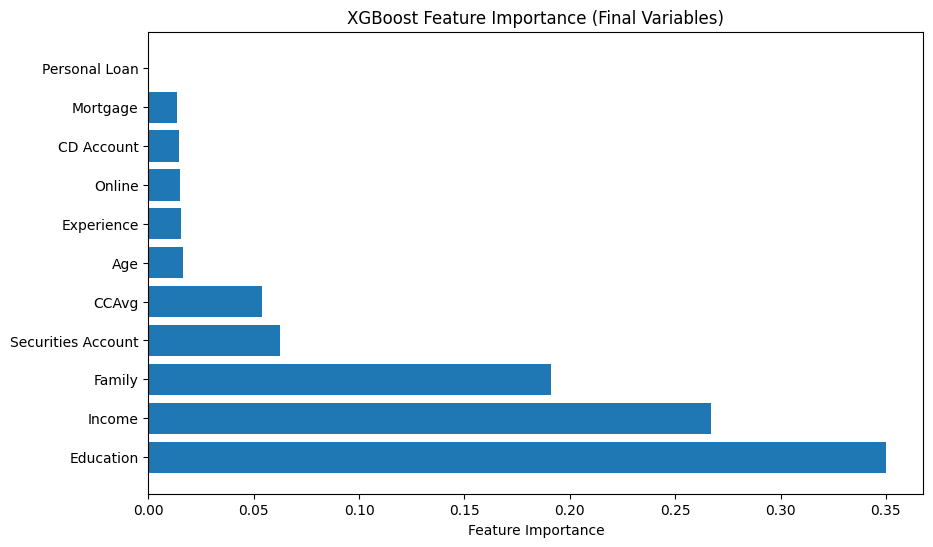

In [20]:
feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [final_variables[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance (Final Variables)')
plt.show()